In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

2023-09-25 15:27:54.669791: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 15:27:55.138756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
num_epochs = 150
batch_size = 256
learning_rate = 0.001

In [3]:
AS_dataset1 = pd.read_csv('./24Train.csv', encoding='utf-8')
AS_dataset2 = pd.read_csv('./25Train.csv', encoding='utf-8')
AS_dataset3 = pd.read_csv('./26Train.csv', encoding='utf-8')
AS_dataset = pd.concat([AS_dataset1, AS_dataset2, AS_dataset3], ignore_index=True).sample(frac=1).reset_index(drop=True)
full_X = AS_dataset.loc[:,'freq':'L4'].to_numpy(dtype = np.float32)
full_y = AS_dataset.loc[:,'S11r':'S41i'].to_numpy(dtype = np.float32)
# X_train, X_vali, y_train, y_vali = train_test_split(full_X, full_y, test_size=0.05, random_state=0)
dataset_train = tf.data.Dataset.from_tensor_slices((full_X, full_y))
dataset_train = dataset_train.shuffle(buffer_size=full_X.shape[0])
dataset_train = dataset_train.batch(batch_size)
dataset_train = dataset_train.prefetch(tf.data.experimental.AUTOTUNE)

2023-09-25 15:27:57.078660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9604 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-09-25 15:27:57.079248: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9621 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5


In [4]:
test_dataset = pd.read_csv('./Test.csv', encoding='utf-8')
X_vali = test_dataset.loc[:,'freq':'L4'].to_numpy(dtype = np.float32)
y_vali = test_dataset.loc[:,'S11r':'S41i'].to_numpy(dtype = np.float32)

In [5]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=512, activation=tf.nn.leaky_relu)
        self.dense2 = tf.keras.layers.Dense(units=1024, activation=tf.nn.leaky_relu)
        self.dense3 = tf.keras.layers.Dense(units=512, activation=tf.nn.leaky_relu)
        self.dense4 = tf.keras.layers.Dense(units=256, activation=tf.nn.leaky_relu)
        self.dense5 = tf.keras.layers.Dense(units=8)
    
#     @tf.function
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        output = self.dense5(x)
        return output

In [6]:
model = MLP()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

2023-09-25 15:27:57.806333: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5594d6ba86d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-25 15:27:57.806355: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2023-09-25 15:27:57.806359: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2023-09-25 15:27:57.809719: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-25 15:27:57.917895: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-25 15:27:58.023358: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


epoch:0
train mse:0.08059506118297577 rmse:0.2838926911354065 mae:0.22999940812587738 r2:0.3283846378326416 EC:0.3128580152988434
vali mse:0.08493293821811676 rmse:0.29143255949020386 mae:0.2352750599384308 r2:0.29693514108657837
epoch:10
train mse:0.0490909107029438 rmse:0.22156468033790588 mae:0.173232302069664 r2:0.5961862206459045 EC:0.5515113472938538
vali mse:0.045592255890369415 rmse:0.21352343261241913 mae:0.16855521500110626 r2:0.6225926876068115
epoch:20
train mse:0.037139106541872025 rmse:0.1927150934934616 mae:0.14889714121818542 r2:0.690398097038269 EC:0.7002122402191162
vali mse:0.03754657506942749 rmse:0.19376938045024872 mae:0.15095624327659607 r2:0.689193844795227
epoch:30
train mse:0.025809600949287415 rmse:0.16065366566181183 mae:0.12319210916757584 r2:0.7845390439033508 EC:0.7526166439056396
vali mse:0.028125185519456863 rmse:0.16770564019680023 mae:0.12943479418754578 r2:0.7671830654144287
epoch:40
train mse:0.013236883096396923 rmse:0.11505164951086044 mae:0.08594

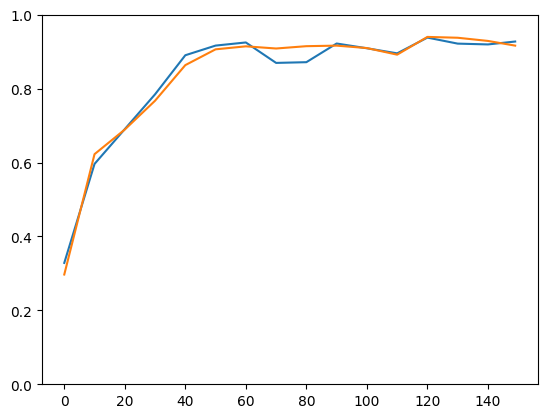

In [7]:
showX = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 149]
showY1 = []
showY2 = []

for epoch_index in range(num_epochs):
    for X, y in dataset_train:
        with tf.GradientTape() as tape:
            y_pred = model(X)
            tr_mse = tf.reduce_mean(tf.square(y_pred - y))
        grads = tape.gradient(tr_mse, model.variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
    if epoch_index % 10 == 0 or epoch_index == num_epochs - 1:
        tr_EC = tf.reduce_mean(tf.reduce_sum(tf.square(y_pred), axis=1))
        tr_rmse = tf.sqrt(tr_mse)
        tr_mae = tf.reduce_mean(tf.abs(y_pred - y))
        tr_r2 = 1 - tf.reduce_sum(tf.square(y_pred - y)) / tf.reduce_sum(tf.square(y - tf.reduce_mean(y)))
        print("epoch:{}".format(epoch_index))
        print("train mse:{} rmse:{} mae:{} r2:{} EC:{}".format(tr_mse, tr_rmse, tr_mae, tr_r2, tr_EC))
        y_v_p = model(X_vali)
        va_mse = tf.reduce_mean(tf.square(y_v_p - y_vali))
        va_rmse = tf.sqrt(va_mse)
        va_mae = tf.reduce_mean(tf.abs(y_v_p - y_vali))
        va_r2 = 1 - tf.reduce_sum(tf.square(y_v_p - y_vali)) / tf.reduce_sum(tf.square(y_vali - tf.reduce_mean(y_vali)))
        print("vali mse:{} rmse:{} mae:{} r2:{}".format(va_mse, va_rmse, va_mae, va_r2))
        showY1.append(tr_r2)
        showY2.append(va_r2)
plt.plot(showX, showY1)
plt.plot(showX, showY2)
plt.ylim(0, 1)
plt.show()